## Model

<font  face=Times color=darkblue size=3> The model hamiltonian is: $$H=J\sum_{<i,j>}\vec{S_i}\cdot \vec{S_j}=J\sum_{<i,j>}(\frac{1}{2}(S_i^+S_j^-+S_i^-S_j^+)+S_i^zS_j^z)$$ with the spin raising/lowering operators.<br><br> We consider $S=1/2$ 1-dimensional spin chain here.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import csv

<font  face=Times color=darkblue size=3> In the 1st notebook, we directly construct the complete matrix of the hamiltonian and directly diagonalize it. But by doing so, we have some problems: <br> 1. The matrix size $M=2^N$ becomes too large quickly. <br> 2.Maximum $N\leq 20$. <br> 3.There are $M^2$ matrix elements to store, and the time to diagonalize is proportional to $M^3$.
    <br><br> Therefore, we can choose the basis in such a way that the hamiltonian becomes block-diagonal, amd the blocks can be diagonalized individually. By doing so, we can reach larger N (not much larger, $N\approx 40$ is max).

### Magnetization Conservation

<font  face=Times color=darkblue size=3 > The simplest example is to use magnetizaiton conservation: $$m_z=\sum_i^N S_i^z\ .$$ Then each block corresponds to fixed value of $m_z$, and there is no matrix elements between states of different $m_z$.
    <br><br> So, the 1st step is to find the states with different values of $m_z$. Then construct each block-matrix and diagonalize individually.

In [15]:
# set parameters
N=7
dimension=2**N
#spin chain with all spin-down
z='0'*N


In [16]:
method=1;   # 0 or 1 corresponds to different way of flipping

In [17]:
energy={} # {} dictionary , [] list
for num_up in range(0,N+1): # we use the number of spin_ups to specify the blocks
    # first, find the states with corresponding mz
    state_list=[]
    for state in range(dimension):
        chain_here=bin(state)[2:] # the spin chain
        num_spinup=chain_here.count('1')
        if num_spinup==num_up:
            state_list.append(state)
    #then,build the block-matrix
    Hmz=np.zeros((len(state_list),len(state_list)))
    for a in range(len(state_list)):
        for i in range(N):
            j=np.mod(i+1,N)
            s_a=bin(state_list[a])[2:]
            s_a=z[0:N-len(s_a)]+s_a
            if s_a[i]==s_a[j]:
                Hmz[a,a]+=0.25
            else:
                Hmz[a,a]-=0.25
                chain_new=copy.deepcopy(s_a)
                element_i=chain_new[i]
                element_j=chain_new[j]
                if method==0:
                    if max(i,j)==N-1:  # this is the concatenation way to exchange i and j  
                        if i>j:
                            chain_new=element_i+chain_new[1:N-1]+element_j
                        else:
                            chain_new=chain_new[0:i]+element_j+element_i
                    else:
                        chain_new=chain_new[0:i]+element_j+element_i+chain_new[j+1:]
                    r=int(chain_new,2)

                else: # using the .join way to exchange the i and j
                    chain1=list(chain_new)
                    chain1[i]=element_j
                    chain1[j]=element_i
                    r=int(''.join(chain1),2)
                if r in state_list:
                    b=state_list.index(r)  # find b after flip
                    Hmz[a,b]=0.5
    eig_v=np.real(np.linalg.eig(Hmz)[0])
    energy[num_up]=eig_v

In [20]:
energy[3]

array([-2.85517926,  1.75      , -2.85517926, -1.80627538, -1.76918131,
       -1.76918131, -1.80627538,  0.75      ,  1.3734898 ,  1.3734898 ,
        1.16833368,  1.16833368,  1.11519204,  1.11519204, -1.25      ,
       -1.11190591,  0.79902143,  0.79902143,  0.52747907,  0.52747907,
        0.29035384,  0.29035384, -1.11190591, -0.75      , -0.82232294,
       -0.82232294, -0.75      , -0.62057349, -0.62057349, -0.21818329,
       -0.21818329, -0.15096887, -0.15096887, -0.16927941, -0.16927941])

<font  face=Times color=darkblue size=3 > Since we use the number of spin-ups to specify the blocks, remember here $m_z=(n_{\uparrow}-n_{\downarrow})/2$ for $S=1/2$ Heisenberg model. 

Text(0, 0.5, 'Energy')

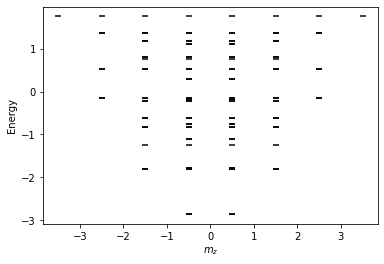

In [19]:
for i in range(N+1):
    plt.scatter([(i-(N-i))/2]*len(energy[i]),energy[i],marker='_',color='black')
plt.xlabel('$m_z$')
plt.ylabel('Energy')

<font  face=Times color=darkblue size=3 > You can see that, for even $N$, the ground state is when $m_z=0$. You can check the situation of odd $N$.

### Momentum States (translationally invariant systems)

<font  face=Times color=darkblue size=3> A periodic chain (ring) is translationally invariant and we define a translation operator which moves the spins one step cyclically to the "right": $$\hat{T}|S_0^z,S_1^z,...,S_{N-1}^z>=|S_{N-1}^z,S_0^z,\dots,S_{N-2}^z>.$$ The hamiltonian commutes with the translation operator: $[H,T]=0$. So we can construct momentum states $|\psi(k)>$ as the eigenstates of the translation operator, $$\hat T|\psi(k)>=e^{ik}|\psi(k)>,$$ with $k=2m\pi/N$ and $m=0,1,2,\dots,N-1$.
    <br><br> A momentum state can be constructed from any representative state: $|a(k)>=\frac{1}{\sqrt{N_a}}\sum_{r=0}^{N-1}e^{-ikr}T^r|a>$. We can obtain the momentum states from the representative states in each block with specific $k$.<br> Remember the translation invariance, the total weight of the component for $R$ (T^R|a>=|a>) is: $1+e^{-ikR}+e^{-i2kR}+\dots+e^{-ik(N-R)}$. The state can survive when $kR=2n\pi$ and the weight of the representative is $N/R$.<br> Therefore, for each block ($k$), the first step is to find the representative states which satisfy the requirements. Notice that for any group of translationally invariant states, we take the lowest integer as the representative.
    <br><br> To build each block-matrix, we can write the hamiltonian as: $H_0=\sum_{j}^NS_j^zS_{j+1}^z$, and $H_j=\frac{1}{2}(S_j^+S_{j+1}^-+S_j^-S_{j+1}^+).$  <br> In the momentum states: $$H|a(k)>=\frac{1}{\sqrt{N_a}}\sum_{j=0}^N\sum_{r=0}^{N-1}e^{-ikr}T^rH_j|a>.$$  In addition, $H_j|a>=h_a^jT^{-l_j}|b_j>$, the $h_a^j$ is the eigenvalue, and |b_j> is another representative state. Therefore, by using the definition of momentum states and removing the summation index $r$, we have: $$H|a(k)>=\sum_{j=0}^Nh_a^je^{-ikl_j}\sqrt{\frac{N_{b_j}}{N_a}}|b_j(k)>.$$ <br> The diagonal and off-diagonal block-matrix elements can be represented as: $$<a(k)|H_0|a(k)>=\sum_j^NS_j^zS_{j+1}^z;$$ $$<b_j(k)|H_{j>0}|a(k)>=\frac{1}{2}e^{-ikl_j}\sqrt{\frac{R_a}{R_{b_j}}}.$$

In [ ]:
# set parameters
N=12
dimension=2**N
#spin chain with all spin-down
z='0'*N

In [ ]:
method=0

In [ ]:
energy={}
for m in range(0,N): #k=m*2pi/N
    print(m)
    d=0
    R_list=[]
    state_list=[]
    # first:find representatives(translation invariance)
    for spinz in range(0,N+1): 
        # by adding this iteration of magnetization conservation, you can further split the hamiltonian (we do not do  it here)
        for state in range(dimension):
            chain_here=bin(state)[2:]
            num_spinup=chain_here.count('1')
            if num_spinup==spinz:
                length=len(chain_here)
                chain_here=z[0:N-length]+chain_here
                for ii in range(1,N+1):
                    chain_here=chain_here[N-1]+chain_here[0:N-1]
                    state_t=int(chain_here,2)
                    if state_t<state:
                        break
                    if state_t==state:   
                        if np.mod(m*ii,N)!=0:   #condition whether the state survives for this k
                            break
                        else:
                            d=d+1
                            R_list.append(ii)
                            state_list.append(state)
                            break
    # construc block-matrix
    Hm=np.zeros((d,d))
    for a in range(d):
        for j in range(N):
            k=np.mod(j+1,N)
            s_a=bin(state_list[a])[2:]
            chain_m=z[0:N-len(s_a)]+s_a
            #diagonal
            if chain_m[j]==chain_m[k]:
                Hm[a,a]+=1/4
            else:
                Hm[a,a]-=1/4
                chain_new=copy.deepcopy(chain_m)
                element_j=chain_new[j]
                element_k=chain_new[k]
                if method==0:
                    if max(j,k)==N-1:  # this is the concatenation way to exchange k and j  
                        if j>k:
                            chain_new=element_j+chain_new[1:N-1]+element_k
                        else:
                            chain_new=chain_new[0:j]+element_k+element_j
                    else:
                        chain_new=chain_new[0:j]+element_k+element_j+chain_new[k+1:]
                    r=int(chain_new,2)
                    t=copy.deepcopy(chain_new)
                else: # using the .join way to exchange the k and j
                    chain1=list(chain_new)
                    chain1[j]=element_k
                    chain1[k]=element_j
                    r=int(''.join(chain1),2)
                    t=copy.deepcopy(''.join(chain1))
                l=0
                for iii in range(1,N): # find the representative of the new chain
                    t=t[N-1]+t[0:N-1]
                    s_t=int(t,2)
                    if s_t<r:
                        r=s_t
                        l=iii
                if r in state_list:
                    b=state_list.index(r)
                    Hm[a,b]+=0.5*np.sqrt(R_list[a]/R_list[b])*np.exp(-1j*2*np.pi*m*l/N) # off-diagonal
    eig_v=np.real(np.linalg.eig(Hm)[0])
    energy[m]=eig_v

0
1


<ipython-input-15-a8a454fee02e>:69: ComplexWarning: Casting complex values to real discards the imaginary part
  Hm[a,b]+=0.5*np.sqrt(R_list[a]/R_list[b])*np.exp(-1j*2*np.pi*m*l/N) # off-diagonal


2
3
4
5
6
7
8
9
10
11


Text(0.5, 1.0, 'N=16')

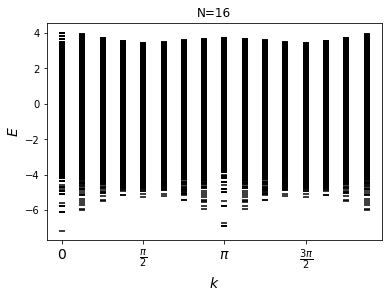

In [ ]:
for i in range(N):
    plt.scatter([i]*len(energy[i]),energy[i],marker='_',color='black')
plt.xlabel(r'$k$',fontsize=14)
plt.ylabel(r'$E$',fontsize=14)
plt.xticks([0,int(N/4),int(N/2),int(3*N/4)],[r'$0$',r'$\frac{\pi}{2}$',r'${\pi}$',r'$\frac{3\pi}{2}$'],fontsize=14)
plt.title('N='+str(N))
#plt.ylim(-8.1,-6.5)

<font  face=Times color=darkblue size=3>  The spin-1 chain energy spectra are kindly provided to us from Prof. Han-Qing Wu from Sun Yat-Sen University in Guang zhou. They have used the Lanczos method to reduced the size of the Hamiltonian matrices, which would be $3^N \times 3^N$ (531441 $\times$ 531441 when $N=12$ and 43046721 $\times$ 43046721 when $N=16$) if one constructed naively.

In [ ]:
#energy_16=np.load('s_onehalf_16.npy').item()
#energy_12=copy.deepcopy(energy)
'''
csv_file=open('Haldane_L_12_test2_En.csv','r')
reader=csv.reader(csv_file)
s1_12=[]
for item in reader:
    if reader.line_num==1:
        continue
    s1_12.append((item))
csv_file.close()
for i in range(len(s1_12)):
    for j in range(2):
        s1_12[i][j]=float(s1_12[i][j])
s1_12=np.array(s1_12)

csv_file=open('haldane_L16_20.csv','r')
reader=csv.reader(csv_file)
s1_16=[]
for item in reader:
    if reader.line_num==1:
        continue
    s1_16.append((item))
csv_file.close()
for i in range(len(s1_16)):
    for j in range(1,3):
        s1_16[i][j]=float(s1_16[i][j])
s1_16=np.array(s1_16,dtype=float)
'''

(-0.2, 4.0)

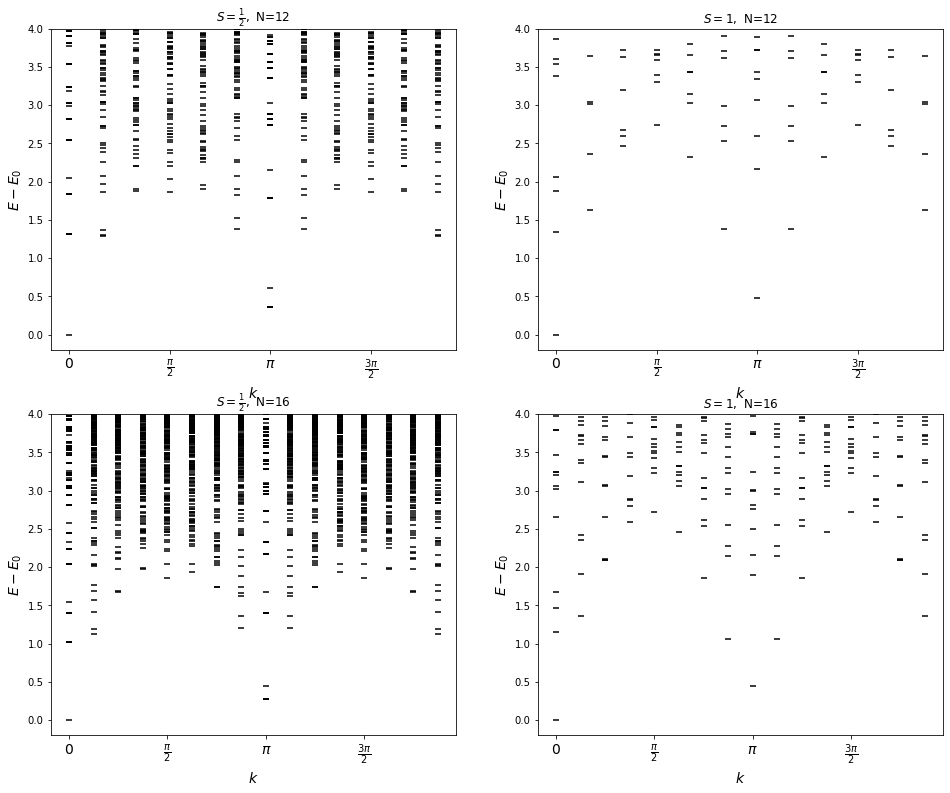

In [ ]:
fig=plt.figure(figsize=(16,13))
ax1=fig.add_subplot(2,2,1)
for i in range(12):
    ax1.scatter([i]*len(energy_12[i]),energy_12[i]-min(energy_12[0]),marker='_',color='black')
plt.xlabel(r'$k$',fontsize=14)
plt.ylabel(r'$E-E_0$',fontsize=14)
plt.xticks([0,int(12/4),int(12/2),int(3*12/4)],[r'$0$',r'$\frac{\pi}{2}$',r'${\pi}$',r'$\frac{3\pi}{2}$'],fontsize=14)
plt.title(r'$S=\frac{1}{2},\ $'+'N='+str(12))
plt.ylim(-0.2,4)
ax2=fig.add_subplot(2,2,2)
ax2.scatter(s1_12[:,1],s1_12[:,0]-min(s1_12[:,0]),marker='_',color='black')
plt.xlabel(r'$k$',fontsize=14)
plt.ylabel(r'$E-E_0$',fontsize=14)
plt.xticks([0,np.pi/2,np.pi,3*np.pi/2],[r'$0$',r'$\frac{\pi}{2}$',r'${\pi}$',r'$\frac{3\pi}{2}$'],fontsize=14)
plt.title(r'$S=1,\ $'+'N='+str(12))
plt.ylim(-0.2,4)
ax3=fig.add_subplot(2,2,3)
for i in range(16):
    ax3.scatter([i]*len(energy_16[i]),energy_16[i]-min(energy_16[0]),marker='_',color='black')
plt.xlabel(r'$k$',fontsize=14)
plt.ylabel(r'$E-E_0$',fontsize=14)
plt.xticks([0,int(16/4),int(16/2),int(3*16/4)],[r'$0$',r'$\frac{\pi}{2}$',r'${\pi}$',r'$\frac{3\pi}{2}$'],fontsize=14)
plt.title(r'$S=\frac{1}{2},\ $'+'N='+str(16))
plt.ylim(-0.2,4)
ax4=fig.add_subplot(2,2,4)
ax4.scatter(s1_16[:,2],s1_16[:,1]-min(s1_16[:,1]),marker='_',color='black')
plt.xlabel(r'$k$',fontsize=14)
plt.ylabel(r'$E-E_0$',fontsize=14)
plt.xticks([0,np.pi/2,np.pi,3*np.pi/2],[r'$0$',r'$\frac{\pi}{2}$',r'${\pi}$',r'$\frac{3\pi}{2}$'],fontsize=14)
plt.title(r'$S=1,\ $'+'N='+str(16))
plt.ylim(-0.2,4)